# Installing a tweet preprocessor

In [22]:

!pip install tweet-preprocessor

# Importing the python libraries

In [23]:
!pip install gensim --upgrade
!pip install pyldavis
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import itertools
from gensim.models import Word2Vec
from wordcloud import WordCloud
from google.colab import drive
from nltk.corpus import stopwords
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate

# Importing the python libraries  to read the csv file from the drive

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import preprocessor as p
drive.mount('/content/drive')   #mounting the drive
path = '/content/drive/MyDrive/Tweet_Covid19.csv'
df = pd.read_csv(path)  #reading the csv file where our tweet data is saved

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#displaying the first few rows of dataset
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340000e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.340000e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.340000e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.340000e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.340000e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Data Cleaning

In [26]:

#here we are cleaing the text data and checking if there are any unwanted data
#before we generate the sentiment from the text

def preprocess_tweet(row):
    tweet = row['text']
    tweet = p.clean(text)
    return tweet

# Importing TextBlob library for the sentiment analysis on text

In [27]:
from textblob import TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [28]:
#getting analysis by getAnalysis method

from textblob import TextBlob
def getAnalysis(score):
   if score < 0:
    return 'Negative'
   elif score == 0:
     return 'Neutral'
   else:
     return 'Positive'
df['sentiment'] = df['polarity'].apply(getAnalysis)

In [29]:
#displaying the first few rows of the dataset after the sentiment analysis on text
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,subjectivity,sentiment
0,1.340000e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.00,0.125000,Neutral
1,1.340000e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,-0.50,0.900000,Negative
2,1.340000e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.00,0.033333,Neutral
3,1.340000e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,-0.05,0.550000,Negative
4,1.340000e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.00,0.000000,Neutral


In [30]:
#listing all the columns present in a dataset
list(df.columns)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet',
 'polarity',
 'subjectivity',
 'sentiment']

<Axes: >

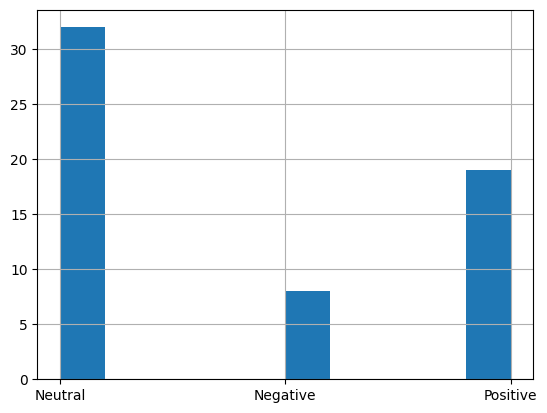

In [31]:
#checking for null values and dropping them
#displaying the sentiments using histogram
df.isnull().values.any()
df = df.dropna()
df['sentiment'].hist(bins=10)

In [32]:
#removing stop words, punctuations and converting into lowercase
#Keep only lowercase characters from the text column to remove noise, removing links
df['text'] = df['text'].replace('[^a-zA-Z]', ' ',regex=True).str.lower()
df['text'] = df['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     folks said daikon paste could treat cytokine s...
2     coronavirus sputnikv astrazeneca pfizerbiontec...
6     bit sad claim fame success vaccination patriot...
9     covidvaccine states start getting covid vaccin...
10    deaths closing mark millions people wait pfize...
15    trump announces vaccine rollout less hours fir...
16    updated yellowfever amp covid immunitypassport...
17    coronavirus iran reports new cases deaths last...
18    pfizer rake billions expensive covidvaccine al...
19    trump administration failed deliver vaccine pr...
21    anyone wondering day pfizerbiontech approval u...
22    trump announces vaccine rollout less hours fir...
25    done thankyounhs nhsuk mhragovuk pfizerbiontec...
26    wear mask wash hands remain socially distant p...
27    avgerinosmoscow pfizerbiontech fda approval ap...
28    interesting detailed article showing well test...
29    vaccine trumpvaccine astrazeneca pfizerbiontec...
30    zubymusic deaths far death nothing worry c

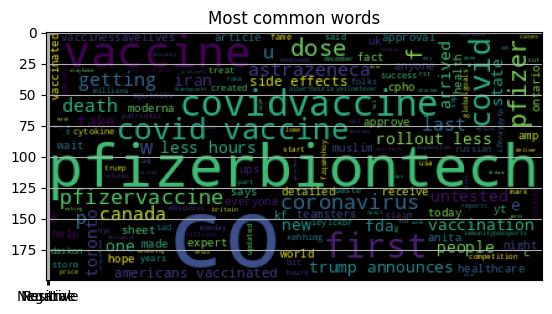

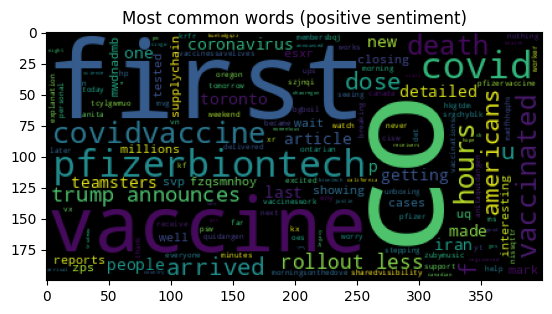

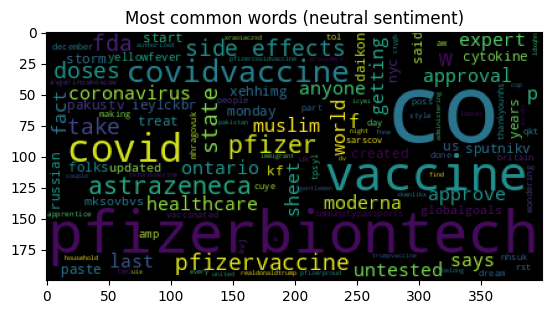

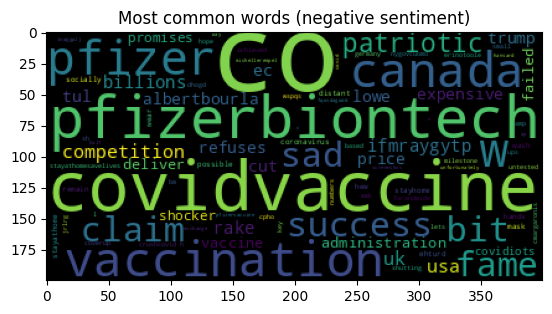

(<matplotlib.image.AxesImage at 0x7b08c17531c0>,
 Text(0.5, 1.0, 'Most common words (negative sentiment)'),
 None)

In [33]:
#Finding most common words from the corpus and common words for each sentiment
#Using word cloud we are graphically representing the word frequency for each sentiment.
df['sentiment'].hist(bins=10)
# Globally
total_wordcloud = WordCloud().generate(' '.join(df['text']))
plt.imshow(total_wordcloud), plt.title('Most common words')
plt.show()
# Per sentiment
pos_df = df[df['sentiment'] == 'Positive']
neu_df = df[df['sentiment'] == 'Neutral']
neg_df = df[df['sentiment'] == 'Negative']

pos_wordcloud = WordCloud().generate(' '.join(pos_df['text']))
neu_wordcloud = WordCloud().generate(' '.join(neu_df['text']))
neg_wordcloud = WordCloud().generate(' '.join(neg_df['text']))

plt.imshow(pos_wordcloud), plt.title('Most common words (positive sentiment)'),plt.show()
plt.imshow(neu_wordcloud), plt.title('Most common words (neutral sentiment)'),plt.show()
plt.imshow(neg_wordcloud), plt.title('Most common words (negative sentiment)'),plt.show()


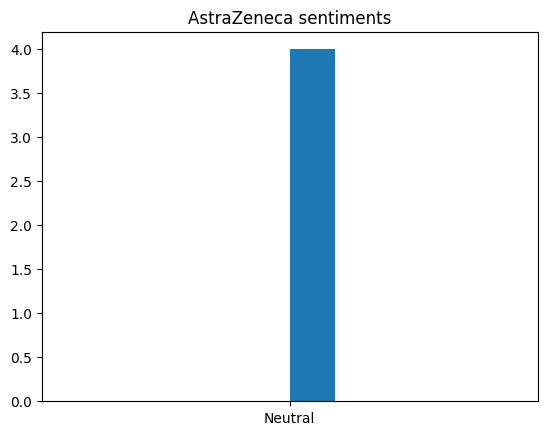

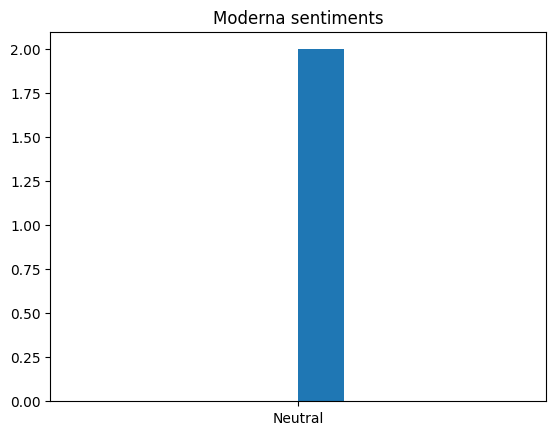

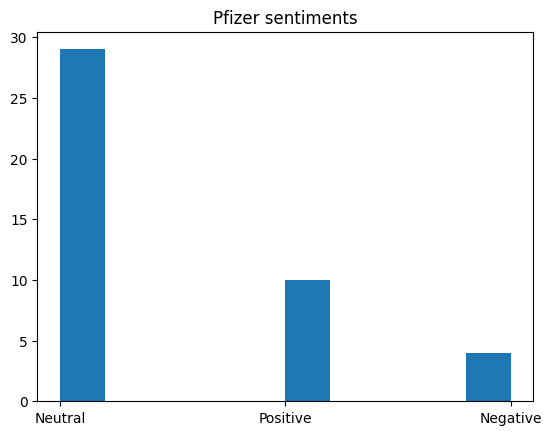

((array([29.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  4.]),
  array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
  <BarContainer object of 10 artists>),
 Text(0.5, 1.0, 'Pfizer sentiments'),
 None)

In [34]:
#comparing the snetiments between diefferent vaccines that are occuring in the source text(astrazeneca-pfizer-moderna)
astra_df = df[df['text'].str.contains('astrazeneca')]
moderna_df = df[df['text'].str.contains('moderna')]
pfizer_df = df[df['text'].str.contains('pfizer') | df['text'].str.contains('biontech')]

plt.hist(astra_df['sentiment']), plt.title('AstraZeneca sentiments'), plt.show()
plt.hist(moderna_df['sentiment']), plt.title('Moderna sentiments'), plt.show()
plt.hist(pfizer_df['sentiment']), plt.title('Pfizer sentiments'), plt.show()

In [35]:
#checking average number of user friends per sentiment.
pos_friends = df[df['sentiment']=='Positive']['user_friends'].astype(int)
neg_friends = df[df['sentiment']=='Negative']['user_friends'].astype(int)
pos_friends.mean(), neg_friends.mean()



(1329.578947368421, 2591.625)

In [36]:
#Subsampling the dataframe and checking the performance
print(len(df[df['sentiment'] == 'Neutral']), len(df[df['sentiment'] == 'Positive']), len(df[df['sentiment'] == 'Negative']))
df = df.sample(frac=1)
subsampled_df = df[df['sentiment'] == 'Neutral'][:int(0.15*len(df))]
print('Subsampled dataframe with neutral sentiments length: ', len(subsampled_df))

32 19 8
Subsampled dataframe with neutral sentiments length:  8


# Creating Train and Test Dataset on Sentiments

In [37]:
#creating the train/test dataset on negative and positive sentiment and
#concating the two data frames subsamples and sentiment data frames.

combined_df = pd.concat([subsampled_df,df[df['sentiment'] == 'Negative'], df[df['sentiment'] == 'Positive']])
combined_df = combined_df[['text', 'sentiment']]
X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['sentiment'], test_size=0.2)


# Vectorization: Bag of words/Tf-idf

In [38]:
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_bow = bow_vectorizer.transform(X_test)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Word2Vec

In [39]:

# Create Word2Vec representation.
print('Training Word2Vec model (after tokenization)...')
tokenized_X_train = [nltk.word_tokenize(tweet) for tweet in X_train]
tokenized_X_test = [nltk.word_tokenize(tweet) for tweet in X_test]
# Learn word vectors from the corpus, dimensionality is 100
model = Word2Vec(tokenized_X_train, vector_size=100, window=5, min_count=5, workers=4)
model.train(tokenized_X_train, total_examples=len(tokenized_X_train), epochs=5)
X_train_w2v = []
print('Transforming train tweets to w2v representation...')

for tweet in tokenized_X_train:
    if len(tweet) > 0:
        text = [word for word in tweet if word in model.wv.key_to_index]
    else:
        text = ['empty']
    # Take the average of each vector
    w2v_tweet = np.mean(model.wv[text], axis=0)
    X_train_w2v.append(w2v_tweet)

# Sanity check and conversion to numpy array
print('Processed this number of tweets: ', len(X_train_w2v))
X_train_w2v = np.array(X_train_w2v)
print('Train corpus shape after word2vec conversion', X_train_w2v.shape)
# Also transform the test set for usage later on
X_test_w2v = []
for tweet in tokenized_X_test:
    if len(tweet) > 0:
        text = [word for word in tweet if word in model.wv.key_to_index]
    else:
        text = ['empty']
    # Take the average of each vector
    w2v_news = np.mean(model.wv[text], axis=0)
    X_test_w2v.append(w2v_news)

# Sanity check and conversion to numpy array
print('Processed this number of tweets: ', len(X_test_w2v))
X_test_w2v = np.array(X_test_w2v)
print('Test corpus shape after word2vec conversion', X_test_w2v.shape)

Training Word2Vec model (after tokenization)...
Transforming train tweets to w2v representation...
Processed this number of tweets:  28
Train corpus shape after word2vec conversion (28, 100)
Processed this number of tweets:  7
Test corpus shape after word2vec conversion (7, 100)


LDA topic modelling: Lemmatization -> stemming -> bag of works (tokenization and stopword removal have already been performed

In [40]:

print(tokenized_X_train[0])

['interesting', 'detailed', 'article', 'showing', 'well', 'tested', 'supplychain', 'sharedvisibility', 'help', 'co', 'yt', 'vn', 'mvg']


# Classification with SVM, RandomForests and KNN

In [41]:

scoring = {'Accuracy': 'accuracy', 'Precision': 'precision_macro', 'Recall': 'recall_macro',
           'F-Measure': 'f1_macro'}
n_jobs = -1

def train_evaluate_classifier(corpus, sentiments, clf):
    if clf == 'svm':
        # Train SVM and evaluate with 10fold
        # Dual = False helps speed up the process
        print('Training SVM classifier...')
        svm_clf = LinearSVC(dual=False)
        svm_score = cross_validate(svm_clf, corpus, sentiments, cv=10, scoring=scoring, n_jobs=n_jobs, verbose=10)
        return svm_score
    elif clf == 'random_forest':
        print('Training Random Forest Classifier...')
        forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=n_jobs, verbose=10)
        forest_score = cross_validate(forest_clf, corpus, sentiments, cv=10, scoring=scoring, n_jobs=n_jobs, verbose=10)
        return forest_score
    elif clf == 'knn':
        # Custom method using ridge classifier
        # After multiple tests, this turned out to be the most successful one metrics-wise
        # Some preprocessing is also done here, by using stop words to remove irrelevant words from the vocabulary
        print('Training KNN classifier')
        knn_clf = KNeighborsClassifier(n_jobs=n_jobs)
        knn_clf.fit(corpus, sentiments)
        knn_clf_score = cross_validate(knn_clf, corpus, sentiments, cv=10, scoring=scoring,
                                         n_jobs=n_jobs,
                                         verbose=10)
        return knn_clf_score

def format_results(score_list):
    results = []
    for clf_score in score_list:
        clf_results = {'Accuracy': float("{0:.4f}".format(np.mean(clf_score['test_Accuracy']))),
                       'Precision': float("{0:.4f}".format(np.mean(clf_score['test_Precision']))),
                       'Recall': float("{0:.4f}".format(np.mean(clf_score['test_Recall']))),
                       'F-Measure': float("{0:.4f}".format(np.mean(clf_score['test_F-Measure'])))}
        results.append(clf_results)
    return results

def predict(corpus, clf):
    print('Predicting on test set...')
    predictions = clf.predict(corpus)
    return predictions

classifiers = ['svm', 'random_forest', 'knn']
corpus_dict = {'bow': X_train_bow, 'tfidf': X_train_tfidf, 'w2v': X_train_w2v}
# Train, evaluate classifiers and format results properly
scores = []
combinations = list(itertools.product(corpus_dict.values(), classifiers))
for current_corpus, classifier in combinations:
    scores.append(train_evaluate_classifier(current_corpus, y_train, classifier))



formatted_scores = format_results(score_list=scores)

print('Results from 10fold cross-validation on the training set')
result_combinations = ['SVM-bow', 'SVM-tfidf', 'SVM-w2v', 'Random Forest-bow', 'Random Forest-tfidf', 'Random Forest w2v',
                       'KNN-bow', 'KNN-tfidf', 'KNN-w2v']

for result_combination, current_result in zip(result_combinations, formatted_scores):
    print(result_combination, current_result)

Training SVM classifier...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Training Random Forest Classifier...


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s


Training KNN classifier


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.09308147430419922s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.19559931755065918s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Paral

Training SVM classifier...
Training Random Forest Classifier...


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0969398021697998s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation 

Training KNN classifier


[Parallel(n_jobs=-1)]: Batch computation too fast (0.11467123031616211s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.03429579734802246s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.07737231254577637s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python

Training SVM classifier...
Training Random Forest Classifier...


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s


Training KNN classifier
Results from 10fold cross-validation on the training set
SVM-bow {'Accuracy': 0.7333, 'Precision': 0.6444, 'Recall': 0.6833, 'F-Measure': 0.6511}
SVM-tfidf {'Accuracy': 0.5667, 'Precision': 0.2722, 'Recall': 0.4667, 'F-Measure': 0.34}
SVM-w2v {'Accuracy': 0.6667, 'Precision': 0.6583, 'Recall': 0.675, 'F-Measure': 0.6333}
Random Forest-bow {'Accuracy': 0.5667, 'Precision': 0.2722, 'Recall': 0.4667, 'F-Measure': 0.34}
Random Forest-tfidf {'Accuracy': 0.5333, 'Precision': 0.2722, 'Recall': 0.4333, 'F-Measure': 0.3222}
Random Forest w2v {'Accuracy': 0.8, 'Precision': 0.6333, 'Recall': 0.7333, 'F-Measure': 0.6711}
KNN-bow {'Accuracy': 0.5667, 'Precision': 0.2722, 'Recall': 0.4667, 'F-Measure': 0.34}
KNN-tfidf {'Accuracy': 0.6833, 'Precision': 0.6, 'Recall': 0.6417, 'F-Measure': 0.5956}
KNN-w2v {'Accuracy': 0.7333, 'Precision': 0.725, 'Recall': 0.6917, 'F-Measure': 0.6889}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.03695988655090332s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.05993008613586426s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
